## Título

Haremos el ejercicio/análisis con datos de la evaluación censal regional nivel primaria de los distritos de Ventanilla y Mi Perú. Específicamente del 6to grado de primaria en el área de Comunicación y Matemática

In [1]:
#Librerías/dependencias
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [30]:
#Leemos data

file = 'FixData/6to/6TO_COMU.csv'
data = pd.read_csv(file, delimiter=';', encoding='latin1')

# Limpiar los nombres de las columnas
data.columns = data.columns.str.replace('ï¿½', '')

print(data.head())

   N  RED                              INSTITUCION_EDUCATIVA GRADO  SECCION   
0  1    1                    I.E. Nï¿½ 5116 "DIVINO CREADOR"   6to        2  \
1  2    1             I.E. Nï¿½ 5122 "ANDRES RAZURI ESTEVEZ"   6to        3   
2  3    1  I.E. Nï¿½ 5124 "LIBERTADOR SIMON BOLIVAR"  HIR...   6to        3   
3  4    1                        I.E. Nï¿½ 5125 "CASUARINAS"   6to        5   
4  5    1              I.E. Nï¿½ 5127 "Mï¿½RTIR JOSE OLAYA "   6to        5   

   TURNO  NRO_DE_ESTUDIANTES_MATRICULADOS  NRO_DE_ESTUDIANTES_EVALUADOS   P1   
0      2                               51                            51   42  \
1      3                              105                           103   92   
2      3                              124                           124   80   
3      5                              172                           168  144   
4      5                              180                           167  151   

   P2  ...  P18  P19  P20  C1  C2  C3  %C1  

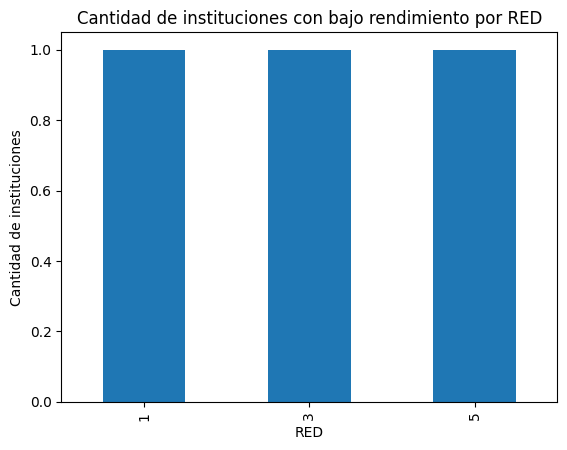

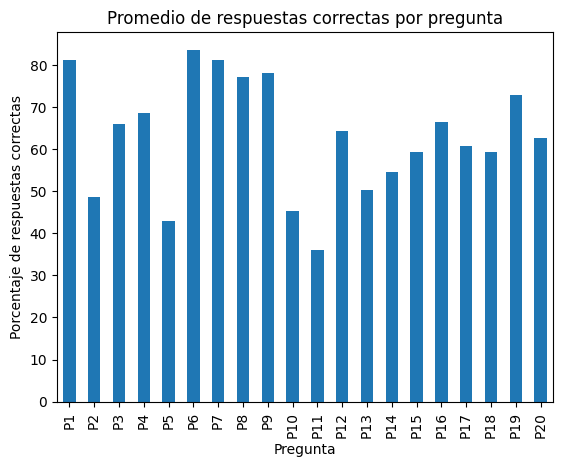

Instituciones con bajo rendimiento y sus porcentajes de aciertos:
    RED                              INSTITUCION_EDUCATIVA   
7     1  I.E. Nï¿½ 5140 PRES. DE LA REPUBLICA DE COLOMB...  \
35    3                    IE 5121 ï¿½PEDRO PLANA SILVAï¿½   
43    5             I.E. Nï¿½ 4020 "JOSï¿½ SANTOS CHOCANO"   

    Porcentaje_aciertos  
7             49.729730  
35            49.057377  
43            33.653846  


In [27]:
# Convertir las respuestas de texto a números
preguntas = ['P{}'.format(i) for i in range(1, 21)]
for pregunta in preguntas:
    data[pregunta] = pd.to_numeric(data[pregunta], errors='coerce')

# Calcular el porcentaje de respuestas correctas por institución
data['Porcentaje_aciertos'] = (data[preguntas].sum(axis=1) / (len(preguntas) * data['NRO_DE_ESTUDIANTES_EVALUADOS'])) * 100

# Filtrar instituciones con menos del 50% de aciertos
instituciones_bajas = data[data['Porcentaje_aciertos'] < 50]

# Contar cantidad de instituciones con bajo rendimiento
cantidad_instituciones_bajas = instituciones_bajas.groupby('RED').size()

# Visualizar cantidad de instituciones con bajo rendimiento por RED
cantidad_instituciones_bajas.plot(kind='bar', title='Cantidad de instituciones con bajo rendimiento por RED')
plt.xlabel('RED')
plt.ylabel('Cantidad de instituciones')
plt.show()

# Calcular el promedio de respuestas correctas por pregunta
promedio_por_pregunta = data[preguntas].mean()

# Visualizar preguntas menos acertadas
promedio_por_pregunta.plot(kind='bar', title='Promedio de respuestas correctas por pregunta')
plt.xlabel('Pregunta')
plt.ylabel('Porcentaje de respuestas correctas')
plt.show()

# Filtrar y visualizar las instituciones con bajo rendimiento y sus porcentajes de aciertos
print("Instituciones con bajo rendimiento y sus porcentajes de aciertos:")
print(instituciones_bajas[['RED', 'INSTITUCION_EDUCATIVA', 'Porcentaje_aciertos']])

Identificamos que Teniendo en cuenta lo siguiente:

P1	P2	P3	P4	P5	P6	P7	P8	P9	P10	P11	P12	P13	P14	P15	P16	P17	P18	P19	P20  
C1	C2	C1	C2	C3	C1	C2	C3	C2	C3	C1	C2	C2	C3	C2	C2	C2	C2	C3	C1


Donde:

C1: Recupera información explícita del texto  
C2: Infiere el significado del texto  
C3: Reflexiona sobre la forma, el contenido y el contexto del texto  

Palabras Clave:

Recuperación de información explícita del texto (C1):

Análisis de texto
Extracción de datos
Reconocimiento de patrones
Minería de texto
Identificación de información relevante
Inferencia del significado del texto (C2):

Procesamiento de lenguaje natural (NLP)
Análisis semántico
Interpretación de texto
Clasificación de texto
Detección de sentimientos
Reflexión sobre la forma, el contenido y el contexto del texto (C3):

Análisis de contexto
Comprensión del contenido
Evaluación crítica del texto
Análisis lingüístico
Contextualización del texto


### Webscrapping para encontrar usuarios con perfiles o capacidades que puedan aportar a 'reforzar'/ayudar en estas competencias

In [33]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager

driver = webdriver.Chrome(ChromeDriverManager().install())

C:\Users\arnol\AppData\Local\Temp\ipykernel_8672\2178917076.py:4: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install())


In [39]:
# Navigate to the LinkedIn login page
driver.get('https://www.linkedin.com/login')
# Enter your email address and password
#CORREGIR
driver.find_element_by_id('username').send_keys('your_email@example.com')
driver.find_element_by_id('password').send_keys('your_password')
# Submit the login form
driver.find_element_by_css_selector('.login__form_action_container button').click()

InvalidArgumentException: Message: invalid argument: invalid locator
  (Session info: chrome=122.0.6261.129)
Stacktrace:
	GetHandleVerifier [0x008D8D03+51395]
	(No symbol) [0x00845F61]
	(No symbol) [0x006FE13A]
	(No symbol) [0x007361E9]
	(No symbol) [0x007363EB]
	(No symbol) [0x0076C162]
	(No symbol) [0x00753ED4]
	(No symbol) [0x0076A570]
	(No symbol) [0x00753C26]
	(No symbol) [0x0072C629]
	(No symbol) [0x0072D40D]
	GetHandleVerifier [0x00C568D3+3712147]
	GetHandleVerifier [0x00C95CBA+3971194]
	GetHandleVerifier [0x00C90FA8+3951464]
	GetHandleVerifier [0x00989D09+776393]
	(No symbol) [0x00851734]
	(No symbol) [0x0084C618]
	(No symbol) [0x0084C7C9]
	(No symbol) [0x0083DDF0]
	BaseThreadInitThunk [0x77A6FCC9+25]
	RtlGetAppContainerNamedObjectPath [0x77BB7C5E+286]
	RtlGetAppContainerNamedObjectPath [0x77BB7C2E+238]


In [40]:
profile_url = 'https://www.linkedin.com/in/arnolcb'
driver.get(profile_url)

#FALTA ADAPTARLO PARA CORRER CON FOR E ITERAR DE ACUERDO A PALBRAS CLAVES